# SMOTE Demo

In [1]:
import pandas as pd
from smote.over_sampling import SMOTE


In [2]:
data = pd.read_csv("KC1.csv")
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,class
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10.0,11.0,25.0,15.0,3.0,False
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12.0,13.0,39.0,21.0,5.0,False
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3.0,1.0,3.0,1.0,1.0,False
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6.0,6.0,9.0,8.0,1.0,False


In [3]:
data_sample = data.loc[[1013, 256, 6, 576, 773, 2104, 500, 131, 2100,1451,1450,1500,2]]
# data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True] 

In [4]:
data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True]

,loc,v(g),class
256,55.0,5.0,True
6,48.0,6.0,True
131,47.0,4.0,True
2,83.0,11.0,True


In [5]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True])
# NearestNeighbors(n_neighbors=1)
nn = neigh.kneighbors(data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True])
# (array([[0.5]]), array([[2]]))
pd.DataFrame(nn[0])


,0,1,2
0,0.0,7.071068,8.062258
1,0.0,2.236068,7.071068
2,0.0,2.236068,8.062258
3,0.0,28.635642,35.355339


In [6]:
pd.DataFrame(nn[1])

,0,1,2
0,0,1,2
1,1,2,0
2,2,1,0
3,3,0,1


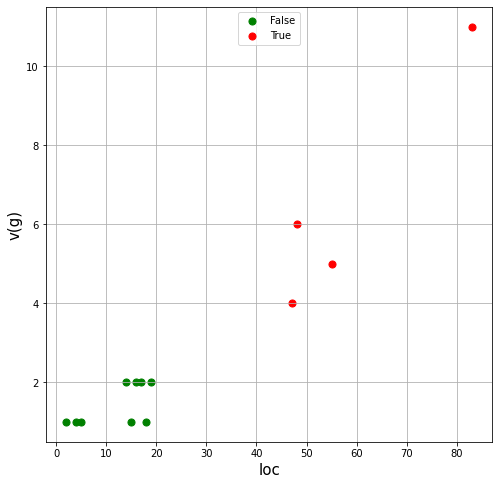

In [9]:
# i += 1
# print(i)
# data_sample = data[['loc','v(g)','class']].sample(10,random_state=59)
# data_sample = data.loc[[1013, 256, 6, 576, 773, 2104, 500, 131, 2100,211,1450]]
import matplotlib.pyplot as plt
principalDf = pd.DataFrame(data = data_sample, columns = ['loc', 'v(g)'])
finalDf = pd.concat([principalDf, data_sample[['class']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = plt.axes() 
ax.set_xlabel('loc', fontsize = 15)
ax.set_ylabel('v(g)', fontsize = 15)
# ax.set_zlabel('V3', fontsize = 15) 
# ax.set_title(i, fontsize = 20)
targets = [False, True]
colors = ['g', 'r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'loc'], finalDf.loc[indicesToKeep, 'v(g)'], c = color, s = 50)
ax.legend(targets,loc=9)
ax.grid()


In [10]:
data_sample[['loc','v(g)','class']]

,loc,v(g),class
1013,2.0,1.0,False
256,55.0,5.0,True
6,48.0,6.0,True
576,15.0,1.0,False
773,5.0,1.0,False
2104,19.0,2.0,False
500,17.0,2.0,False
131,47.0,4.0,True
2100,14.0,2.0,False
1451,4.0,1.0,False


In [51]:
1 - 0.999

0.0010000000000000009

In [66]:
from tensorflow.keras.losses import BinaryCrossentropy
bce = BinaryCrossentropy()
bce([[0]],[[0.745]])

<tf.Tensor: shape=(), dtype=float32, numpy=1.3664914>

OrderedDict([(True, 4)])
[[55.  5.  1.]
 [48.  6.  1.]
 [47.  4.  1.]
 [83. 11.  1.]]
[[1 2]
 [2 0]
 [1 0]
 [0 1]]
4
[6 4 6 5]
8
step  [[0.49577329]
 [0.13382953]
 [0.14211109]
 [0.21855868]]
Steps [[0.49577329]
 [0.13382953]
 [0.14211109]
 [0.21855868]]
rows [3 2 3 2]
cols [0 0 0 1]
diffs [[-28.  -6.   0.]
 [  1.   2.   0.]
 [-28.  -6.   0.]
 [  8.   1.   0.]]
nn_data [[55.  5.  1.]
 [48.  6.  1.]
 [47.  4.  1.]
 [83. 11.  1.]]
nn_num [[1 2]
 [2 0]
 [1 0]
 [0 1]]
nn_num row cols  [0 1 0 0]
X row [[83. 11.  1.]
 [47.  4.  1.]
 [83. 11.  1.]
 [47.  4.  1.]]
[[69.11834779  8.02536024  1.        ]
 [47.13382953  4.26765906  1.        ]
 [79.02088961 10.14733349  1.        ]
 [48.74846941  4.21855868  1.        ]]
odict_items([(True, 4)])


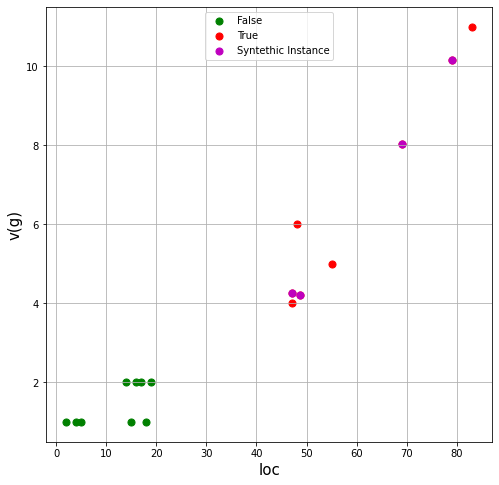

In [11]:
import matplotlib.pyplot as plt
sm = SMOTE(random_state=9, sampling_strategy=0.9, k_neighbors=2)
X_train, y_train = sm.fit_sample(data_sample[['loc','v(g)','class']], data_sample['class'])
# noise = np.random.normal(0,1,[len(X_train),2])
# X_train[['loc','v(g)']] = X_train[['loc','v(g)']] + noise
principalDf = pd.DataFrame(data = X_train, columns = ['loc', 'v(g)'])
finalDf = pd.concat([principalDf, X_train[['class']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = plt.axes() 
ax.set_xlabel('loc', fontsize = 15)
ax.set_ylabel('v(g)', fontsize = 15)
# ax.set_zlabel('V3', fontsize = 15) 
# ax.set_title(i, fontsize = 20)
targets = [False, True]
colors = ['g', 'r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'loc'], finalDf.loc[indicesToKeep, 'v(g)'], c = color, s = 50)

targets = [False, True, "Syntethic Instance"]
ax.scatter(X_train[X_train.index >= len(data_sample)]['loc'], X_train[X_train.index >= len(data_sample)]['v(g)'], c = 'm', s = 50)
ax.legend(targets,loc=9)
ax.grid()


In [102]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix    #Confussion Matrix
from sklearn.metrics import accuracy_score
import math

def gmeans(y_true, Y_pred):
    # repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    pd = tp/(tp+fn)
    gmeans = math.sqrt(pd*(1-pf))
    return gmeans

In [215]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential       
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
import tensorflow.keras
from imblearn.over_sampling import SMOTE
tensorflow.keras.backend.set_floatx('float64')
from sklearn.preprocessing import MinMaxScaler
scaller = MinMaxScaler()

X_train = scaller.fit_transform(data_sample.iloc[:,data_sample.columns != 'class'])
opt = optimizers.Adam(learning_rate=0.005)
model = Sequential()
# model.add(Dense(, activation='relu', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)))

# input = Input(21)
model.add(Dense(21 ,activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
model.add(Dense(15 ,activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
model.add(Dense(10 ,activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
model.add(Dense(5 ,activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
# model.add(Dense(1 ,activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
# model.add(Dense(5 ,activation='linear', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
model.add(Dense(10 ,activation='linear', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
model.add(Dense(15 ,activation='linear', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));
model.add(Dense(21, activation='linear', kernel_initializer=tensorflow.keras.initializers.glorot_uniform(seed=42)));

#     model.add(Dropout(drop))
# model.add(Dense(21, activation='sigmoid'))
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

sm = SMOTE(random_state=9, sampling_strategy=1, k_neighbors=5)
X_train, y_train = sm.fit_sample(X_train, data_sample['class'])
X_train_pure = X_train.copy()

noise = np.random.normal(0,1,[len(X_train),21])
X_train_noise = X_train + noise * 0.05

model.fit(X_train_noise, X_train_pure, epochs = 100, batch_size = 64, verbose = 1)
test = model.predict(X_train)
# model.summary()
# result = gmeans(y_dev_true_collect, y_dev_pred_collect)

Epoch 1/100
56/56 [==============================] - 0s 946us/step - loss: 0.0148 - accuracy: 0.5177
Epoch 2/100
56/56 [==============================] - 0s 982us/step - loss: 0.0059 - accuracy: 0.6862
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.7605
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.7785
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.7872
Epoch 6/100
56/56 [==============================] - 0s 1000us/step - loss: 0.0028 - accuracy: 0.7832
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.7877
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.7790
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.7824
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.7768
Ep

56/56 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.8202
Epoch 83/100
56/56 [==============================] - 0s 982us/step - loss: 0.0017 - accuracy: 0.8177
Epoch 84/100
56/56 [==============================] - 0s 982us/step - loss: 0.0017 - accuracy: 0.8172
Epoch 85/100
56/56 [==============================] - 0s 999us/step - loss: 0.0017 - accuracy: 0.8194
Epoch 86/100
56/56 [==============================] - 0s 999us/step - loss: 0.0017 - accuracy: 0.8160
Epoch 87/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.8219
Epoch 88/100
56/56 [==============================] - 0s 994us/step - loss: 0.0017 - accuracy: 0.8197
Epoch 89/100
56/56 [==============================] - 0s 946us/step - loss: 0.0016 - accuracy: 0.8172
Epoch 90/100
56/56 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.8216
Epoch 91/100
56/56 [==============================] - 0s 910us/step - loss: 0.0016 - accuracy: 0.8245

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
# depth = int()
dt = DecisionTreeClassifier()

score = make_scorer(gmeans)


cv_results = cross_validate(dt, test, y_train, cv=10, scoring=score)
cv_results['test_score'].mean()
# result = gmeans(y_train, y_pred)
# result

0.7772844568282088

In [217]:
cv_results = cross_validate(dt, X_train, y_train, cv=10, scoring=score)
cv_results['test_score'].mean()

0.8468302266909727